# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

Now you have a dataframe set up, you are ready to dive in and start cleaning!

In [173]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None



# Create a new dataframe from your CSV
df = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [129]:
# Print out any information you need to understand your dataframe
print(df.shape)

(23486, 11)


In [174]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

In [175]:
cols = df.columns[:30] 
colours = ['#000099', '#ffff00'] 


<AxesSubplot:>

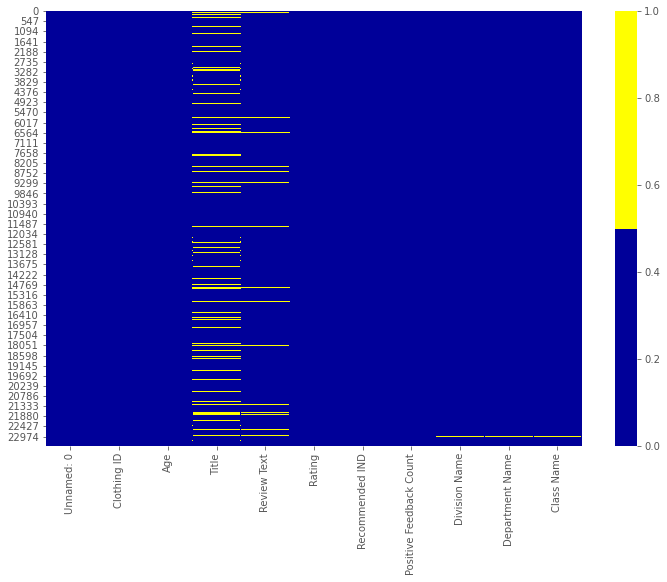

In [132]:
# Plot a heatmap of any missing data
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [176]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


In [177]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        

created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

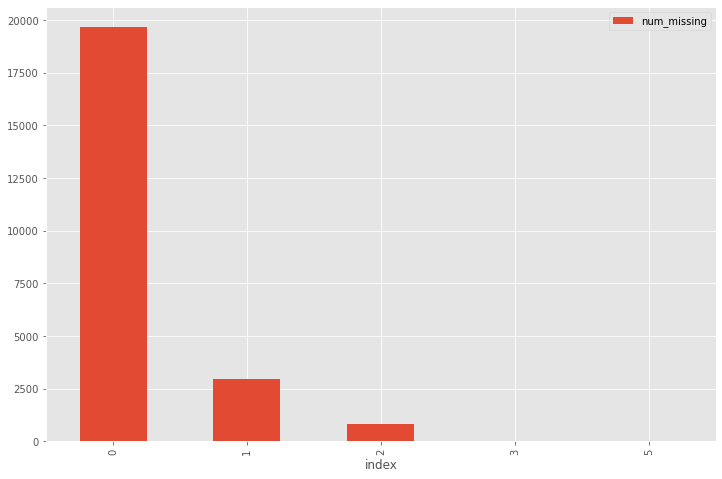

In [178]:
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

<AxesSubplot:>

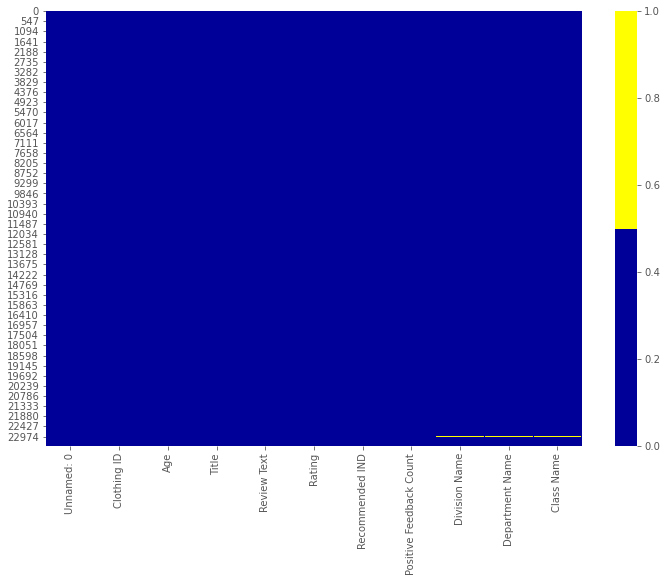

In [179]:
df['Title'] = df['Title'].fillna('_MISSING_')
df['Review Text'] = df['Review Text'].fillna('_MISSING_')
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 23486 non-null  int64 
 1   Clothing ID                23486 non-null  int64 
 2   Age                        23486 non-null  int64 
 3   Title                      23486 non-null  object
 4   Review Text                23486 non-null  object
 5   Rating                     23486 non-null  int64 
 6   Recommended IND            23486 non-null  int64 
 7   Positive Feedback Count    23486 non-null  int64 
 8   Division Name              23472 non-null  object
 9   Department Name            23472 non-null  object
 10  Class Name                 23472 non-null  object
 11  Title_ismissing            23486 non-null  bool  
 12  Review Text_ismissing      23486 non-null  bool  
 13  Division Name_ismissing    23486 non-null  bool  
 14  Depart

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Clothing ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Recommended IND'}>,
        <AxesSubplot:title={'center':'Positive Feedback Count'}>],
       [<AxesSubplot:title={'center':'num_missing'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

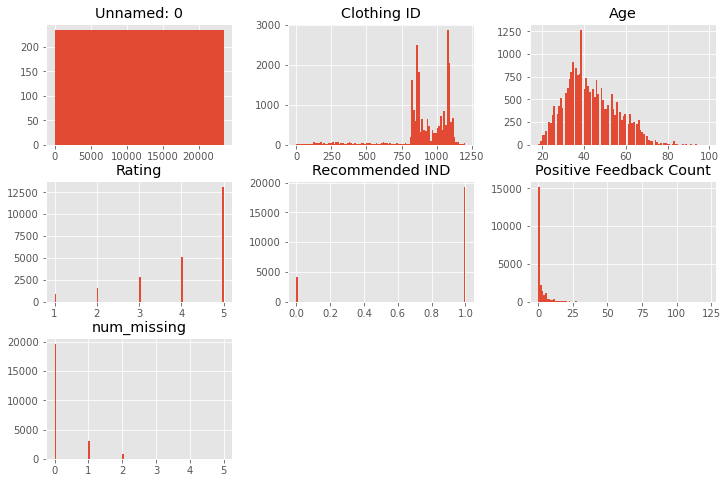

In [181]:
# Plot a histogram to see if there are any outliers.
df.hist(bins=100)


<AxesSubplot:>

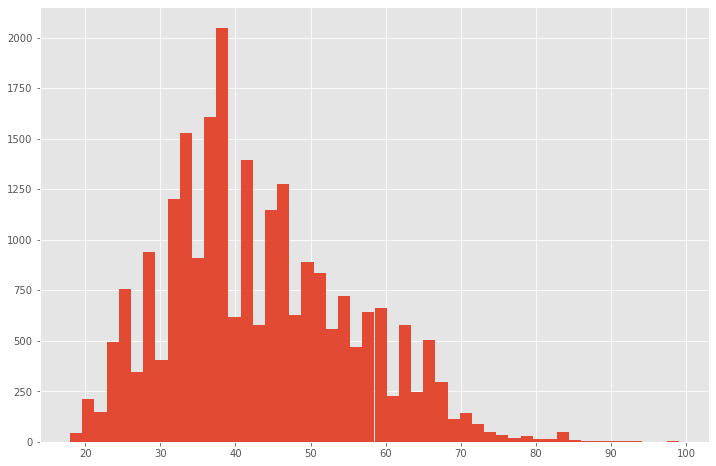

In [182]:
df["Age"].hist(bins=50)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

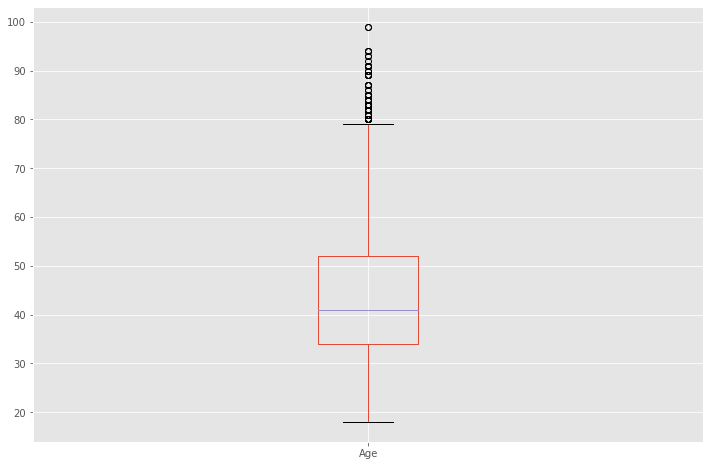

In [183]:
df.boxplot(column=['Age'])

In [184]:
# Use the describe() method
df["Age"].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:>

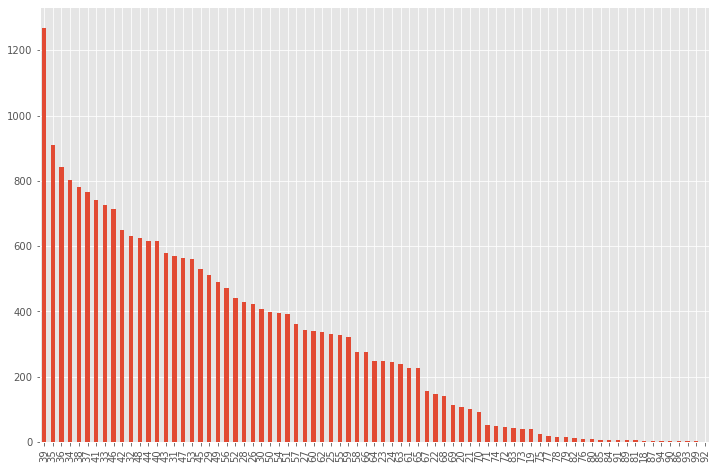

In [185]:
# Plot a bar chart

df["Age"].value_counts().plot.bar()


In [186]:
# Handle any outliers in your dataframe
df[df['Age'] > 88].index


Int64Index([  659,  3023,  5901,  6543,  8078,  8327,  9513, 10617, 10686,
            11545, 12250, 12631, 14997, 15372, 15802, 17412, 17578, 18036,
            18563, 19304],
           dtype='int64')

In [187]:
df.iloc[3023]

Unnamed: 0                                                                3023
Clothing ID                                                                302
Age                                                                         89
Title                                                                _MISSING_
Review Text                  Love the fabric, fits true to size, great qual...
Rating                                                                       5
Recommended IND                                                              1
Positive Feedback Count                                                      0
Division Name                                                        Initmates
Department Name                                                       Intimate
Class Name                                                                Swim
Title_ismissing                                                           True
Review Text_ismissing                               

In [191]:
df.drop(df[df['Age'] > 88].index, inplace= True)

<AxesSubplot:>

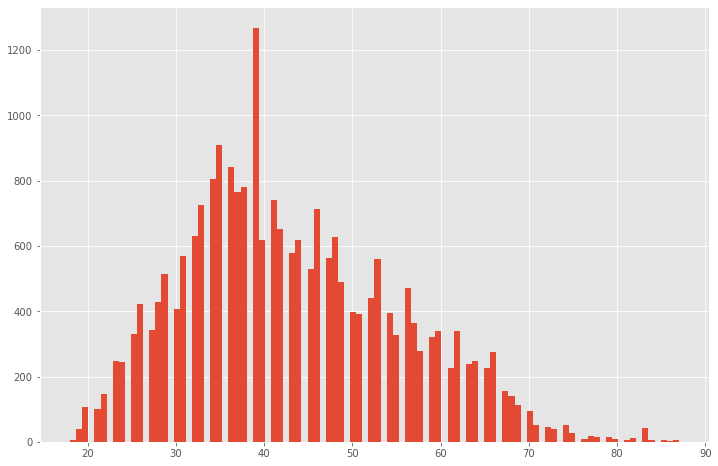

In [195]:
df["Age"].hist(bins=100)

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [197]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_ismissing: 96.40331%
False    22622
True       844
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94034%
False    23452
True        14
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94034%
False    23452
True        14
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94034%
False    23452
True        14
Name: Class Name_ismissing, dtype: int64



In [213]:
# Look for duplicates. How will you handle any duplicates?
df_dedupped = df.drop('Clothing ID', axis=1).drop_duplicates()
print(df.shape)
print(df_dedupped.shape)

(23466, 17)
(23466, 16)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# duplicate observations or irrelevant observations will mke our datasets uninformative,also Structural errors are when you measure or transfer data and notice strange naming conventions, typos, or incorrect capitalization. These inconsistencies can cause mislabeled categories or classes .
# and we should Handle missing data to make our data  more informative.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [210]:
# Try to convert all the strings in a column to lower or upper case.
df['Division Name'] = df['Division Name'].str.lower()
df['Division Name'].value_counts(dropna=False)

general           13836
general petite     8117
initmates          1499
NaN                  14
Name: Division Name, dtype: int64

In [209]:

df['Title'] = df['Title'].str.lower()
df['Title'].value_counts(dropna=False)

_missing_                                    3803
love it!                                      135
beautiful                                      95
love                                           88
love!                                          84
                                             ... 
summer favorite                                 1
cute shirt but the sewing is slightly off       1
little something different for a t-shirt        1
dress for the younger girls                     1
flattering romper                               1
Name: Title, Length: 13987, dtype: int64

In [217]:
df["Class Name"] = df['Class Name'].str.lower()
df['Class Name'].value_counts(dropna=False)


dresses           6312
knits             4841
blouses           3097
sweaters          1426
pants             1388
jeans             1144
fine gauge        1099
skirts             944
jackets            704
lounge             690
swim               347
outerwear          328
shorts             317
sleep              228
legwear            165
intimates          154
layering           146
trend              119
NaN                 14
casual bottoms       2
chemises             1
Name: Class Name, dtype: int64